In [20]:
# import libraries 
import pandas as pd 
import folium
import json
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [119]:
def min_max_normalization(series):
    min_val = series.min()
    max_val = series.max()
    normalized_series = (series - min_val) / (max_val - min_val)
    return normalized_series

In [3]:
#혐오범죄 파일 읽어오기
df = pd.read_excel('./hate_crime_dataset.xlsx')

In [28]:
df['month'] = pd.to_datetime(df['incident_date']).dt.month

In [60]:
df_2017 = df[df['data_year'] == 2017]
df_2018 = df[df['data_year'] == 2018]
df_2019 = df[df['data_year'] == 2019]
df_2020 = df[df['data_year'] == 2020]
df_2021 = df[df['data_year'] == 2021]

df_2017a = df[(df['data_year'] == 2017) & (df["bias_desc"] == "Anti-Asian")]
df_2018a = df[(df['data_year'] == 2018) & (df["bias_desc"] == "Anti-Asian")]
df_2019a = df[(df['data_year'] == 2019) & (df["bias_desc"] == "Anti-Asian")]
df_2020a = df[(df['data_year'] == 2020) & (df["bias_desc"] == "Anti-Asian")]
df_2021a = df[(df['data_year'] == 2021) & (df["bias_desc"] == "Anti-Asian")]

In [70]:
df['incident'] = pd.to_datetime(df['data_year'].apply(str)+'-'+df['month'].apply(str))

In [68]:
races = ['White', 'Black', 'Hispanic', 'Asian', 'Multiple Races']

df_Black = df.loc[df['bias_desc'].str.contains('Black')]
df_Hispanic = df.loc[df['bias_desc'].str.contains('Hispanic')]
df_Asian = df.loc[df['bias_desc'].str.contains('Asian')]
df_Multi = df.loc[df['bias_desc'].str.contains('Multiple Races')]

# Black인종

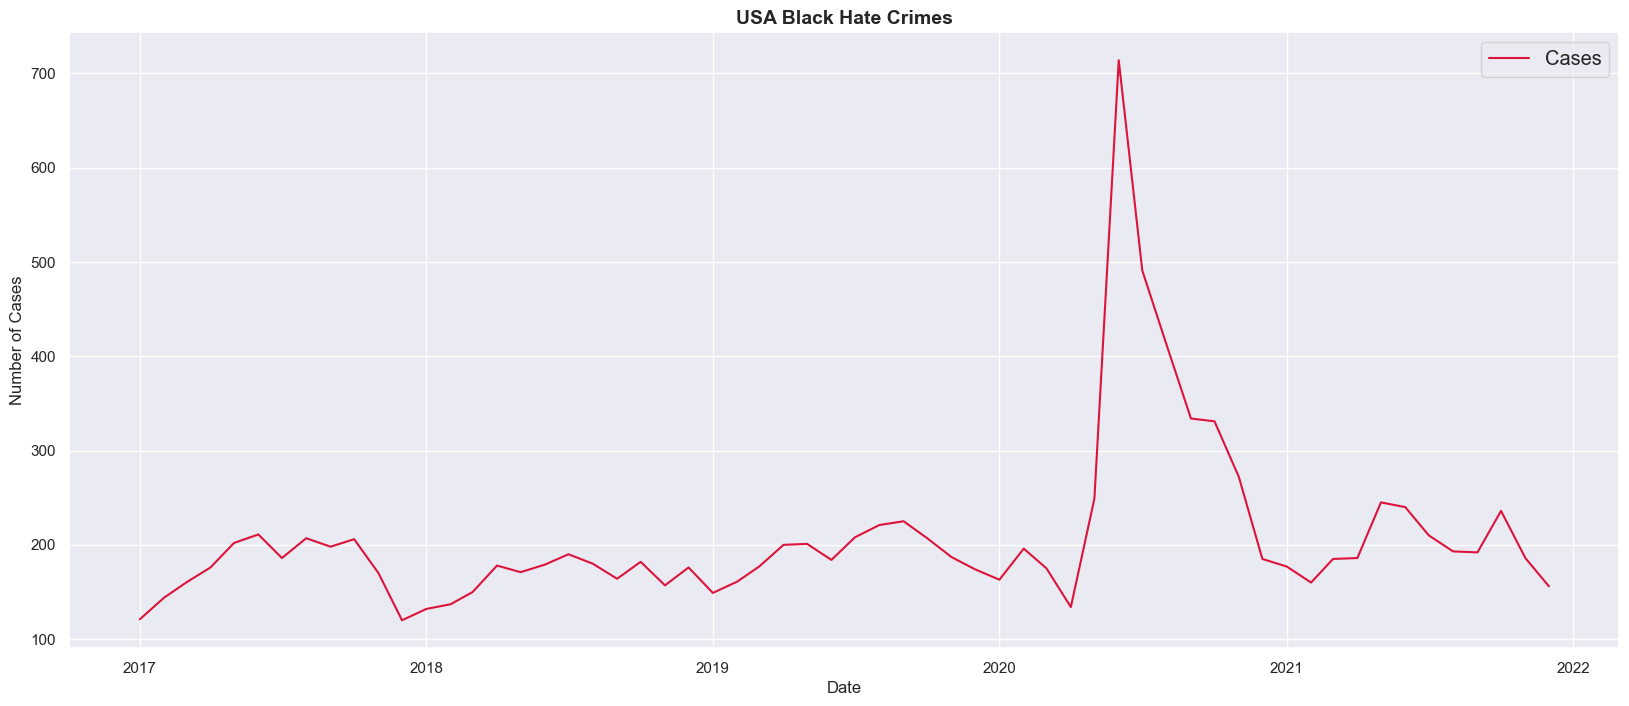

In [71]:
df_black_tl = df_Black.groupby(['incident']).agg(cases = ('incident', 'size'))
df_black_tl = pd.DataFrame(df_black_tl).reset_index()

sns.set()
label = ['Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_black_tl['incident'], df_black_tl['cases'], color='crimson')
plt.title("USA Black Hate Crimes", fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize='large')
plt.show()

# 라틴 인종

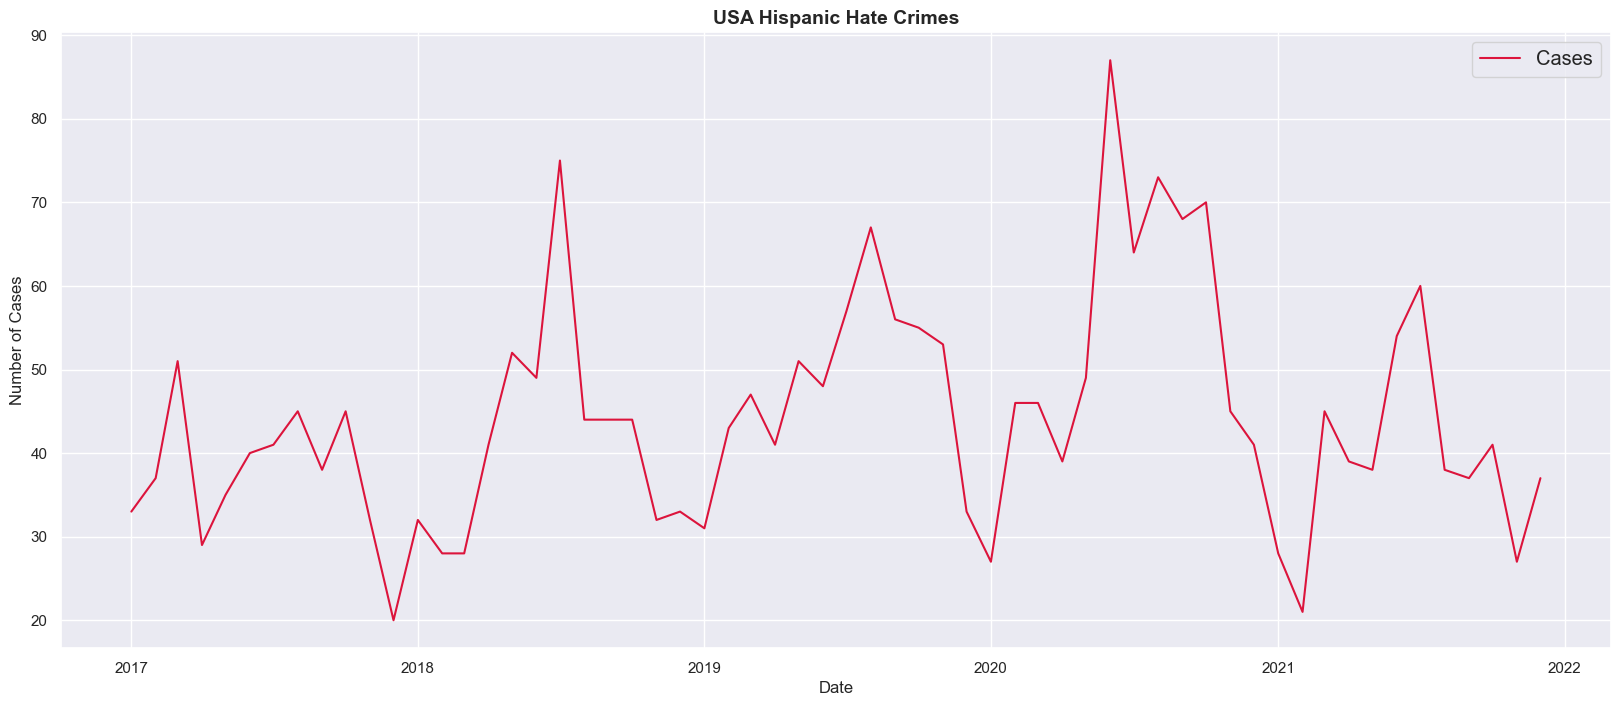

In [72]:
df_latin_tl = df_Hispanic.groupby(['incident']).agg(cases = ('incident', 'size'))
df_latin_tl = pd.DataFrame(df_latin_tl).reset_index()

sns.set()
label = ['Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_latin_tl['incident'], df_latin_tl['cases'], color='crimson')
plt.title("USA Hispanic Hate Crimes", fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize='large')
plt.show()

# 아시안 인종

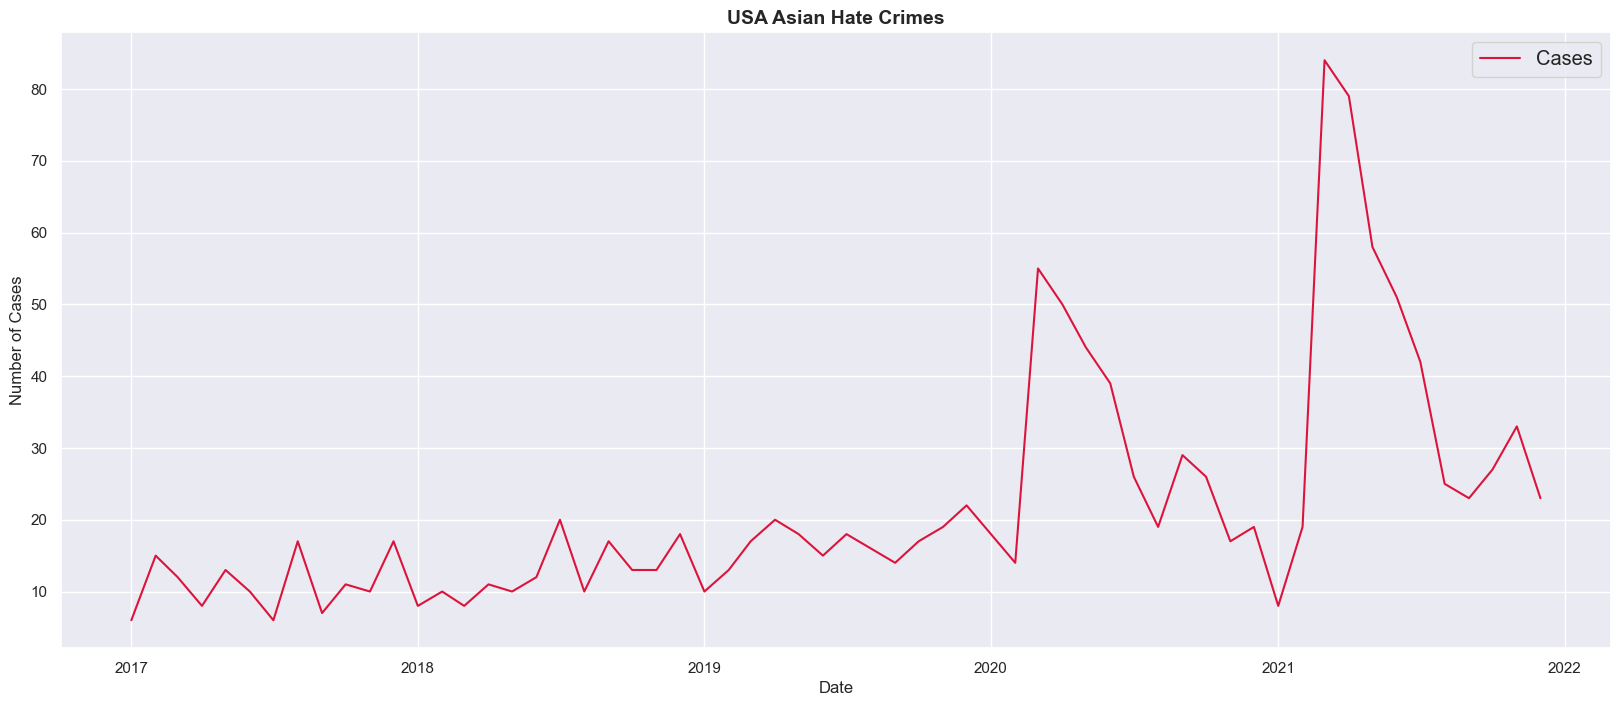

In [73]:
df_asian_tl = df_Asian.groupby(['incident']).agg(cases = ('incident', 'size'))
df_asian_tl = pd.DataFrame(df_asian_tl).reset_index()

sns.set()
label = ['Cases']
plt.figure(figsize = (20, 8))
plt.plot(df_asian_tl['incident'], df_asian_tl['cases'], color='crimson')
plt.title("USA Asian Hate Crimes", fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(labels = label, fontsize='large')
plt.show()

In [82]:
#아시안 편견 추출하기
def Asian_Calc(df_year, df__year_asian):
    df = df_year.copy()
    df_temp = df__year_asian.copy()
    df = df.groupby(['state_name']).agg(hate_crime_case = ('state_name', 'size'))
    df_temp = df_temp.groupby(['state_name']).agg(hate_crime_case = ('state_name', 'size'))
    df = df_temp*10/df
    df = df.fillna(0)
    return df.squeeze()

#전체 사건 발생수에서 아시안 혐오 범죄의 비율을 구한다
new_data = []
new_data.append(Asian_Calc(df_2017,df_2017a)) 
new_data.append(Asian_Calc(df_2018,df_2018a))
new_data.append(Asian_Calc(df_2019,df_2019a))
new_data.append(Asian_Calc(df_2020,df_2020a))
new_data.append(Asian_Calc(df_2021,df_2021a))
new_data[1]["Wyoming"] = 0.0
new_data[1]["Alabama"] = 0.0



# 주별로 구분이 가능하도록 개별 주 경계 데이터로 나눠준다

In [5]:
total_boundary_path = 'dataset/boundary.json'

# 전체 주별 json파일 열기
with open(total_boundary_path) as f:
    data = json.load(f)

# 개별 주 경계 데이터를 담을 딕셔너리
states_data = {}

count = 0
# GeoJSON 데이터를 순회하며 주(State) 경계 데이터 분리
for feature in data['features']:
    state_name = feature['properties']['NAME']
    states_data[state_name] = {
        'type': 'FeatureCollection',
        'features': [feature]
    }

# 개별 주 경계 데이터를 개별 파일로 저장
for state_name, state_data in states_data.items():
    state_json_path = f'state_boundary_data/{state_name}.json'
    
    with open(state_json_path, 'w') as f:
        json.dump(state_data, f)

In [6]:
#Federal이 state_name인 경우는 연방 수사국이 자체적으로 조사한 혐오범죄로 특정 주로 인식하지 못하여 제거해준다
df = df[df["state_name"] != "Federal"]
df["state_name"].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
       'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico',
       'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [7]:
normalized_data = []
#2017~2021년도의 정규화 데이터 저장
for i in [2017,2018,2019,2020,2021]:
    normalized_data.append(pd.read_csv(f"dataset/normalized_dataset_{i}.csv"))

#number_of_offenders_normalized는 공격자가 특정되지 않은 경우 0이될 수 있어서 hate_crime_case_normalized를 이용하는 것이 가장 효과적

In [8]:
def style_function(feature):
    return {
        'fillColor': 'gray',
        'weight': 1,
    }

In [101]:
Asian_data = []
for i in range(5):
    Asian_data.append(new_data[i] * normalized_data[i].set_index('state_name')['hate_crime_case_normalized'].squeeze())

state_name
Alaska                    76.316522
Alabama                   28.857182
Arkansas                  81.595838
Arizona                  224.517796
California               181.360860
Colorado                 244.174006
Connecticut              736.848739
District of Columbia    1261.444816
Delaware                 114.939428
Florida                   34.497140
Georgia                  135.515384
Hawaii                   114.289732
Iowa                      59.666120
Idaho                    115.634597
Illinois                  57.832991
Indiana                  146.391064
Kansas                   263.778182
Kentucky                 244.917186
Louisiana                151.265904
Massachusetts            302.206158
Maryland                  67.906153
Maine                    263.055220
Michigan                 257.746628
Minnesota                169.167260
Missouri                  93.840445
Mississippi               69.268485
Montana                  172.101949
Nebraska         

# 아시안 편견 유형 시각화

In [138]:
for i in [2017,2018,2019,2020,2021]:
    #2017 ~ 2021년도 데이터 순차적 출력
    
    #8개의 구역으로 경계를 나눔
    bins = list(data.quantile([0,0.25,0.5,0.75,1]))
    data = min_max_normalization(Asian_data[i-2017])
    
    # Folium 지도 객체 생성
    m = folium.Map(
        location=[38, -95],
        zoom_start=5,
        tiles='cartodbpositron',
    )  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

    m.choropleth(
        geo_data= total_boundary_path,
        #2017 ~ 2021년도 데이터 순차적 출력
        data=data,
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.4,
        key_on='properties.NAME',
        legend_name=f"{i}년도 주별 아시안 혐오범죄 발생",
        #bins=bins,
        )
    # JSON 파일을 Folium에 추가
    for state in df["state_name"].unique():
        geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
        folium.GeoJson(
            geojson_path,
            name=state,
            style_function=style_function,
        ).add_to(m)

    folium.LayerControl().add_to(m)
    # 지도를 HTML 파일로 저장
    m.save(f'{i}_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method 

# 단순 사건 수를 이용한 시각화

In [86]:
for i in [2017,2018,2019,2020,2021]:
    #2017 ~ 2021년도 데이터 순차적 출력
    data = normalized_data[i-2017].set_index('state_name')['hate_crime_case_normalized'].squeeze()
    
    #8개의 구역으로 경계를 나눔
    bins = list(data.quantile([0,0.15,0.3,0.45,0.60,0.75,0.9,1]))

    # Folium 지도 객체 생성
    m = folium.Map(
        location=[38, -95],
        zoom_start=5,
        tiles='cartodbpositron',
    )  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

    m.choropleth(
        geo_data= total_boundary_path,
        #2017 ~ 2021년도 데이터 순차적 출력
        data=data,
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.4,
        key_on='properties.NAME',
        legend_name=f"{i}년도 주별 혐오범죄 발생",
        bins=bins,
        )
    # JSON 파일을 Folium에 추가
    for state in df["state_name"].unique():
        geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
        folium.GeoJson(
            geojson_path,
            name=state,
            style_function=style_function,
        ).add_to(m)

    folium.LayerControl().add_to(m)
    # 지도를 HTML 파일로 저장
    m.save(f'Total_map/{i}_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method 

Alabama주에는 거의 혐오범죄가 없었는데 2021년도에 크게 증가한것이 좀 신기하다

# 아시안 통합데이터

In [141]:
intergrated_data = Asian_data[0]
for i in range(1,4):
    intergrated_data += Asian_data[i]

In [144]:
data = min_max_normalization(intergrated_data)
    
#10개의 구역으로 경계를 나눔
bins = list(data.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

# Folium 지도 객체 생성
m = folium.Map(
    location=[38, -95],
    zoom_start=5,
    tiles='cartodbpositron',
)  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

m.choropleth(
    geo_data= total_boundary_path,
    #2017 ~ 2021년도 데이터 순차적 출력
    data=data,
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.4,
    key_on='properties.NAME',
    legend_name=f"2017~2021년도 통합 주별 아시안 혐오범죄 발생",
    bins=bins,
    )
# JSON 파일을 Folium에 추가
for state in df["state_name"].unique():
    geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
    folium.GeoJson(
        geojson_path,
        name=state,
        style_function=style_function,
    ).add_to(m)

folium.LayerControl().add_to(m)
# 지도를 HTML 파일로 저장
m.save(f'2017~2021_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 2017 ~ 2021 통합자료 시각화

In [136]:
intergrated_data = normalized_data[0]
for i in range(1,4):
    intergrated_data['hate_crime_case_normalized'] += normalized_data[i]['hate_crime_case_normalized']
data = intergrated_data.set_index('state_name')['hate_crime_case_normalized'].squeeze()

In [137]:
data = intergrated_data.set_index('state_name')['hate_crime_case_normalized'].squeeze()
data = min_max_normalization(data)
print(data)
#5개의 구역으로 경계를 나눔
bins = list(data.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

# Folium 지도 객체 생성
m = folium.Map(
    location=[38, -95],
    zoom_start=5,
    tiles='cartodbpositron',
)  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

m.choropleth(
    geo_data= total_boundary_path,
    #2017 ~ 2021년도 데이터 순차적 출력
    data=data,
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.4,
    key_on='properties.NAME',
    legend_name=f"2017~2021년도 통합 주별 혐오범죄 발생",
    bins=bins,
    )
# JSON 파일을 Folium에 추가
for state in df["state_name"].unique():
    geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
    folium.GeoJson(
        geojson_path,
        name=state,
        style_function=style_function,
    ).add_to(m)

folium.LayerControl().add_to(m)
# 지도를 HTML 파일로 저장
m.save(f'intergrated_map/2017~2021_map.html')

state_name
Alaska                  0.045004
Alabama                 0.000000
Arkansas                0.049734
Arizona                 0.164253
California              0.128851
Colorado                0.202920
Connecticut             0.709987
District of Columbia    1.000000
Delaware                0.063283
Florida                 0.002420
Georgia                 0.107161
Hawaii                  0.085870
Iowa                    0.030237
Idaho                   0.066552
Illinois                0.027156
Indiana                 0.106315
Kansas                  0.214484
Kentucky                0.142774
Louisiana               0.120539
Massachusetts           0.217033
Maryland                0.027714
Maine                   0.209687
Michigan                0.190230
Minnesota               0.117217
Missouri                0.050843
Mississippi             0.029425
Montana                 0.129209
Nebraska                0.143051
North Carolina          0.095617
North Dakota            0.100022

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [225]:
normalized_race_data = []
#2017~2021년도의 정규화 데이터 저장
for i in [2017,2018,2019,2020,2021]:
    normalized_race_data.append(pd.read_csv(f"dataset/norm_{i}_race.csv"))

# 인종을 구분한 시각화 - 아시안 인종 적용

In [226]:
for i in [2017,2018,2019,2020,2021]:
    #2017 ~ 2021년도 데이터 순차적 출력
    #주별 아시안 인종에 대할 차별 추출
    data = normalized_race_data[i-2017].set_index('State')['Asian'].squeeze()
    
    #8개의 구역으로 경계를 나눔
    bins = list(data.quantile([0,0.15,0.3,0.45,0.60,0.75,0.9,1]))

    # Folium 지도 객체 생성
    m = folium.Map(
        location=[38, -95],
        zoom_start=5,
        tiles='cartodbpositron',
    )  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

    m.choropleth(
        geo_data= total_boundary_path,
        #2017 ~ 2021년도 데이터 순차적 출력
        data=data,
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.4,
        key_on='properties.NAME',
        legend_name=f"{i}년도 주별 아시안 인종 혐오범죄 발생",
        bins=bins,
        )
    # JSON 파일을 Folium에 추가
    for state in df["state_name"].unique():
        geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
        folium.GeoJson(
            geojson_path,
            name=state,
            style_function=style_function,
        ).add_to(m)

    folium.LayerControl().add_to(m)
    # 지도를 HTML 파일로 저장
    m.save(f'Asian_map/{i}_Asian_hate_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method 

# 인종을 구분한 시각화 - 흑인 적용

In [227]:
for i in [2017,2018,2019,2020,2021]:
    #2017 ~ 2021년도 데이터 순차적 출력
    #주별 아시안 인종에 대할 차별 추출
    data = normalized_race_data[i-2017].set_index('State')['Asian'].squeeze()
    
    #8개의 구역으로 경계를 나눔
    bins = list(data.quantile([0,0.15,0.3,0.45,0.60,0.75,0.9,1]))

    # Folium 지도 객체 생성
    m = folium.Map(
        location=[38, -95],
        zoom_start=5,
        tiles='cartodbpositron',
    )  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

    m.choropleth(
        geo_data= total_boundary_path,
        #2017 ~ 2021년도 데이터 순차적 출력
        data=data,
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.4,
        key_on='properties.NAME',
        legend_name=f"{i}년도 주별 흑인 혐오범죄 발생",
        bins=bins,
        )
    # JSON 파일을 Folium에 추가
    for state in df["state_name"].unique():
        geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
        folium.GeoJson(
            geojson_path,
            name=state,
            style_function=style_function,
        ).add_to(m)

    folium.LayerControl().add_to(m)
    # 지도를 HTML 파일로 저장
    m.save(f'Black_map/{i}_Asian_hate_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method 

In [228]:
intergrated_data = normalized_race_data[0].set_index('State')['Asian'].squeeze()

for i in range(1,5):
    intergrated_data += normalized_race_data[i].set_index('State')['Asian'].squeeze()

# 인종을 구분한 통합 시각화 - 아시안 인종 적용

In [229]:
data = intergrated_data
    
#8개의 구역으로 경계를 나눔
bins = list(data.quantile([0,0.15,0.3,0.45,0.60,0.75,0.9,1]))

# Folium 지도 객체 생성
m = folium.Map(
    location=[38, -95],
    zoom_start=5,
    tiles='cartodbpositron',
)  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

m.choropleth(
    geo_data= total_boundary_path,
    #2017 ~ 2021년도 데이터 순차적 출력
    data=data,
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.4,
    key_on='properties.NAME',
    legend_name=f"주별 2017~2021 아시안 인종 혐오범죄 발생",
    bins=bins,
    )
# JSON 파일을 Folium에 추가
for state in df["state_name"].unique():
    geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
    folium.GeoJson(
        geojson_path,
        name=state,
        style_function=style_function,
    ).add_to(m)

folium.LayerControl().add_to(m)
# 지도를 HTML 파일로 저장
m.save(f'intergrated_map/intergrated_Asian_hate_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [230]:
intergrated_data = normalized_race_data[0].set_index('State')['Black'].squeeze()

for i in range(1,5):
    intergrated_data += normalized_race_data[i].set_index('State')['Black'].squeeze()

# 인종을 구분한 통합 시각화 - 흑인 적용

In [231]:
data = intergrated_data
    
#8개의 구역으로 경계를 나눔
bins = list(data.quantile([0,0.15,0.3,0.45,0.60,0.75,0.9,1]))

# Folium 지도 객체 생성
m = folium.Map(
    location=[38, -95],
    zoom_start=5,
    tiles='cartodbpositron',
)  # 초기 지도 중앙 위치와 확대 레벨 타일 모양 설정

m.choropleth(
    geo_data= total_boundary_path,
    #2017 ~ 2021년도 데이터 순차적 출력
    data=data,
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.4,
    key_on='properties.NAME',
    legend_name=f"주별 2017~2021 흑인 혐오범죄 발생",
    bins=bins,
    )
# JSON 파일을 Folium에 추가
for state in df["state_name"].unique():
    geojson_path = f'state_boundary_data/{state}.json'  # 각 주의 경계 데이터 파일 경로
    folium.GeoJson(
        geojson_path,
        name=state,
        style_function=style_function,
    ).add_to(m)

folium.LayerControl().add_to(m)
# 지도를 HTML 파일로 저장
m.save(f'intergrated_map/intergrated_Black_hate_map.html')

C:\Users\parkg\anaconda3\envs\2023-DS-B\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
